In [1]:
from ib_insync import *
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
#import statsmodels
#import statsmodels.api as sm
#from statsmodels.tsa.stattools import coint, adfuller
#from statsmodels import regression,stats
import math
import datetime 
import statsmodels.formula.api as smf 
from datetime import date, time, datetime, timedelta
#from xml.etree import ElementTree as ET
#from IPython.core.debugger import set_trace
import seaborn as sns
import random
from ta import add_all_ta_features
from ta.utils import dropna
from ta.trend import *

In [2]:
# Connect to IB Server
ib=IB()
util.startLoop()
ib.connect('127.0.0.1',7497, clientId= 595)

<IB connected to 127.0.0.1:7497 clientId=595>

In [114]:
#define a function to get IB data. endDate is the last date of the historical data 

def get_data(contract, history, freq, side, endDate =''):
    
    bar = ib.reqHistoricalData(
        contract,
        endDateTime = endDate,
        durationStr=history,
        barSizeSetting= freq,
        whatToShow=side,
        useRTH=True,
        formatDate=1)
    
# use util in ib-insync to convert bar data into pandas dataframe    
    df = util.df(bar)
# return df 
    return df 
# find a stock contract and fully qualify it with all the attributes

history = '2 Y'
freq = '1 day'
side ='Trades' # last trade, or ASK, or Bid

ticker1 ='EL'
ticker2 = 'TLT'
ticker3 = 'DIA'

contract1 = Contract(symbol = ticker1, secType = 'STK', exchange = 'SMART',currency = 'USD')
ib.qualifyContracts(contract1)

contract2 = Contract(symbol = ticker2, secType = 'STK', exchange = 'SMART',currency = 'USD')
ib.qualifyContracts(contract2)

contract3 = Contract(symbol = ticker3, secType = 'STK', exchange = 'SMART',currency = 'USD')
ib.qualifyContracts(contract2)

endDate = '20190822 23:59:59' 

df1 = get_data(contract1, history, freq, side,endDate )
df2 = get_data(contract2, history, freq, side,endDate )

In [115]:
df1.date.iloc[-1]

datetime.date(2019, 8, 22)

In [123]:
from ta.momentum import *
from ta.volatility import BollingerBands

rsi = rsi(df1.close, window =20)

px =''
for index, row in df1.iterrows():        
        #px1 = row['close']        
        #price = px1        
        #prev_price = px        
        #px = px1        
        #print (price, prev_price)
        
        #print (index)
        print (df1['close'][index], df1['close'][index])



104.45 104.45
106.01 106.01
106.5 106.5
105.96 105.96
105.7 105.7
105.66 105.66
106.99 106.99
107.93 107.93
107.95 107.95
108.07 108.07
108.23 108.23
108.81 108.81
108.74 108.74
108.9 108.9
109.66 109.66
110.01 110.01
109.69 109.69
110.27 110.27
110.35 110.35
110.23 110.23
108.25 108.25
107.58 107.58
107.98 107.98
107.96 107.96
108.52 108.52
106.35 106.35
107.84 107.84
108.2 108.2
108.45 108.45
109.94 109.94
110.02 110.02
109.74 109.74
109.63 109.63
109.59 109.59
109.73 109.73
109.49 109.49
111.0 111.0
111.28 111.28
110.51 110.51
109.98 109.98
109.7 109.7
108.8 108.8
109.07 109.07
110.24 110.24
111.12 111.12
111.79 111.79
111.87 111.87
110.85 110.85
111.81 111.81
122.12 122.12
120.15 120.15
121.71 121.71
121.12 121.12
122.22 122.22
123.08 123.08
123.78 123.78
124.61 124.61
126.32 126.32
126.02 126.02
124.61 124.61
125.64 125.64
124.69 124.69
125.18 125.18
125.5 125.5
125.84 125.84
126.19 126.19
125.15 125.15
125.31 125.31
123.93 123.93
124.83 124.83
124.77 124.77
125.34 125.34
124.5 12

In [112]:
df1['close'].iloc[2]

156.94

In [ ]:
pos =100, previous close = 100, price today 105, the pnl = 100* (105-100)=500

In [ ]:
if you hit -2 sigma
    setHoldings(0) if currentHolding >0: # close long position
    setHolding (-1) if currenholding =0 #open short position only when you have no position
    


<AxesSubplot:>

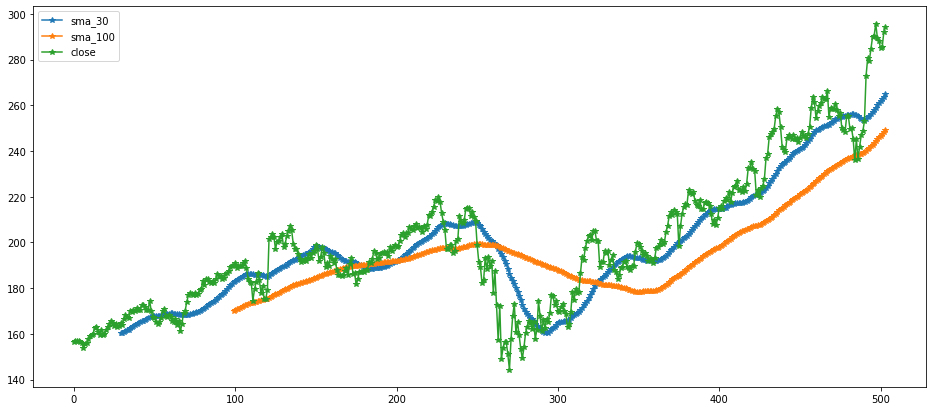

In [74]:
from ta.momentum import *
from ta.volatility import BollingerBands

rsi = rsi(df1.close, window =20)
sma = sma_indicator(df1.close, window =30)
smal = sma_indicator(df1.close, window =100)
ema= ema_indicator(df1.close, window =20)
bb_h = BollingerBands(df1.close, window=20, window_dev=2).bollinger_hband() 
bb_l = BollingerBands(df1.close, window=20, window_dev=2).bollinger_lband() 
bb_m = BollingerBands(df1.close, window=20, window_dev=2).bollinger_mavg() 

sma.plot(figsize =[16,7], legend = True, marker ="*")
smal.plot( legend = True,marker ="*")
#ema.plot(legend = True)
#rsi.plot(figsize =[10,10])
#bb_h.plot(legend = True)
#bb_l.plot(legend = True)
#bb_m.plot(legend = True)
df1.close.plot(legend = True,marker ="*")

In [53]:
df1['log'] = get_data(contract1, history, freq, side )['close'].apply(lambda x: math.log(x))
df2['log'] = get_data(contract2, history, freq, side )['close'].apply(lambda x: math.log(x))


In [55]:
df1.log

0      5.809583
1      5.775855
2      5.745084
3      5.741399
4      5.695448
         ...   
247    5.972893
248    5.972027
249    5.972256
250    5.967991
251    5.966224
Name: log, Length: 252, dtype: float64

<AxesSubplot:>

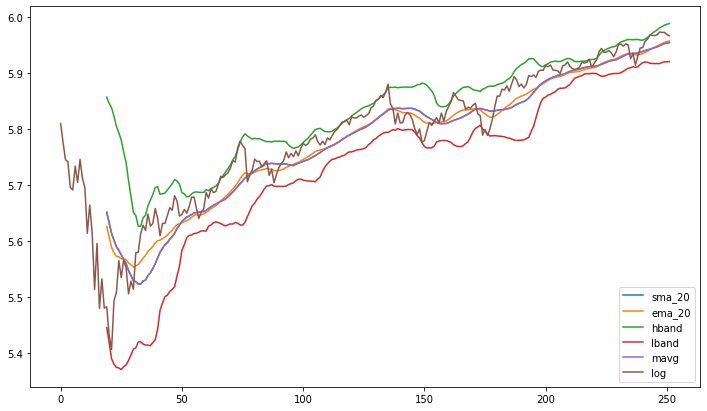

In [69]:
from ta.momentum import *
from ta.volatility import BollingerBands

rsi = rsi(df1.log, window =20)
sma = sma_indicator(df1.log, window =20)
ema= ema_indicator(df1.log, window =20)
bb_h = BollingerBands(df1.log, window=20, window_dev=2).bollinger_hband() 
bb_l = BollingerBands(df1.log, window=20, window_dev=2).bollinger_lband() 
bb_m = BollingerBands(df1.log, window=20, window_dev=2).bollinger_mavg() 

sma.plot(figsize =[12,7], legend = True)
ema.plot(legend = True)
#rsi.plot(figsize =[10,10])
bb_h.plot(legend = True)
bb_l.plot(legend = True)
bb_m.plot(legend = True)
df1.log.plot(legend = True)


In [83]:
#The following codes will be run every day
from ta.momentum import *
#from ta.volatility import BollingerBands

ticker ="SPY"
contract1 = Contract(symbol = ticker1, secType = 'STK', exchange = 'SMART',currency = 'USD')
ib.qualifyContracts(contract1)

endDate = '' 
#live trading use the most recent data

df1 = get_data(contract1, history, freq, side,endDate )

rsi = rsi(df1.close, window =20)

df1['rsi']= rsi

df1

,date,open,high,low,close,volume,average,barCount,rsi
0,2019-02-26,156.86,158.20,155.84,156.44,14171,156.8510,10350,NaN
1,2019-02-27,155.49,157.45,154.37,157.05,6863,156.4840,5715,NaN
2,2019-02-28,157.09,158.76,156.09,156.94,6520,157.4815,5148,NaN
3,2019-03-01,158.22,159.21,156.09,156.92,7811,157.2655,5851,NaN
4,2019-03-04,157.77,158.56,154.38,156.29,11613,156.1390,8888,NaN
...,...,...,...,...,...,...,...,...,...
499,2021-02-18,287.68,289.44,286.75,287.96,4907,287.8305,3919,64.762016
500,2021-02-19,287.99,290.00,284.68,285.16,5568,286.2300,4132,62.677853
501,2021-02-22,283.98,289.84,283.62,285.45,6325,286.9805,4598,62.808342
502,2021-02-23,284.48,294.98,283.13,291.90,10339,291.0075,8029,65.622323


Error 1100, reqId -1: Connectivity between IB and Trader Workstation has been lost.


In [51]:
rsi.iloc[-1] # the last row, the most recent one

66.62778878629909

In [ ]:
if rsi.iloc[-1] > 80:
    
    #order
    
    ib.positions() give you the current TWS positions. 
    if you already have positions in ib.positions (): 
        do not order...
        
elif 

  # order different
    
